# AdaBoost Model

In [1]:
# importing some needed modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing the data
filename = 'drugAbuse_data_cleaned_model_ready.csv'
df = pd.read_csv(filename)

In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# function to describe model results
# model must already be fitted
def model_results(model,X,y):
    
    y_pred = model.predict(X)
    print("Results")
    print("\n")
    # accuracy score
    print("Accuracy Score: {}".format(accuracy_score(y_pred,y)))

    # classification report 
    print("Classification Report: \n {}".format(classification_report(y,y_pred)))

    # confusion matrix 
    print("Confusion Matrix: \n {}".format(confusion_matrix(y,y_pred)))

    # AUC score 
    print("AUC Score: {}".format(roc_auc_score(y,model.predict_proba(X)[:,1])))

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:,1])

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()    

Since we are using a learning rate, we should scale our data before we use our algorithm. Thus, we will use a pipeline.

We will use a balanced decision tree as our base estimator.

Tuned AdaBoost Parameters: {'adaboost__learning_rate': 1, 'adaboost__n_estimators': 50}
Results


Accuracy Score: 0.934121312076
Classification Report: 
              precision    recall  f1-score   support

          0       0.98      0.95      0.96      9742
          1       0.66      0.81      0.73      1172

avg / total       0.94      0.93      0.94     10914

Confusion Matrix: 
 [[9246  496]
 [ 223  949]]
AUC Score: 0.964884637995


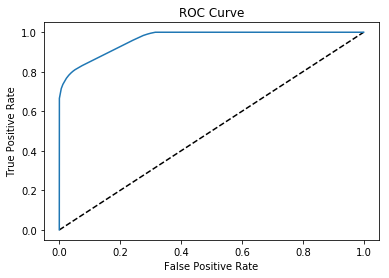

CPU times: user 2min 7s, sys: 1.12 s, total: 2min 8s
Wall time: 2min 9s


In [8]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create our X and y
X = df.drop(columns=['Severe Psychological Distress Past Month'])
y = df['Severe Psychological Distress Past Month'].values

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('adaboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced')))]

pipeline = Pipeline(steps)

# Specify the hyperparameter space

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=37)

n_trees = [10,20,50,100]
learning_rates = [10,1,0.1,0.01,0.001]

parameters = {'adaboost__n_estimators':n_trees,
             'adaboost__learning_rate':learning_rates}

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters,cv=5,scoring='average_precision')

# Fit to the training set
cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned AdaBoost Parameters: {}".format(cv.best_params_)) 
# see results on training data 
model_results(cv,X_train,y_train)

We get very accurate results on the training data. Let's see how the algorithm performs on the test data.

Results


Accuracy Score: 0.834844737565
Classification Report: 
              precision    recall  f1-score   support

          0       0.90      0.92      0.91      3265
          1       0.13      0.11      0.12       374

avg / total       0.82      0.83      0.83      3639

Confusion Matrix: 
 [[2998  267]
 [ 334   40]]
AUC Score: 0.461327398842


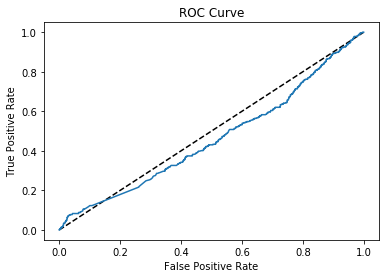

In [10]:
ada_boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                               learning_rate=1,n_estimators=50)
ada_boost.fit(X_train,y_train)
model_results(ada_boost,X_test,y_test)